In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingRegressor
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score

plt.rcParams['figure.figsize'] = 15, 10

In [8]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Proportion'])
    return missing_data[missing_data['Total'] > 0]

def plot_categorical(df, features, target_feature, effect_plot=sns.barplot):
    
    n = len(features)
    fig, axes = plt.subplots(nrows=n, ncols=2)

    for row, feature in zip(axes, features):
            count_ax, effect_ax = row
            #count_ax.set_title(f"{feature} count")
            sns.countplot(training_data[feature], ax=count_ax)
            #effect_ax.set_title(f"{feature} effect on {target_feature}")
            effect_plot(x=feature, y=target_feature, data=training_data, ax=effect_ax)

In [27]:
training_data = pd.read_csv('./input/train.csv')
test_data = pd.read_csv('./input/test.csv')

training_data['Exterior2nd'].name

'Exterior2nd'


# Data Cleaning

Let us first get an idea of what values are missing from the data set.

In [324]:
training_records, training_features = training_data.shape
test_records, test_features = test_data.shape

print(f"The number of records in the training set is {training_records}")
print(f"The number of records in the test set is {test_records}")

The number of records in the training set is 1460
The number of records in the test set is 1459


In [325]:
print('Training Data')
missing_data(training_data)

Training Data


,Total,Proportion
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [326]:
print('Test Data')
missing_data(test_data)

Test Data


,Total,Proportion
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


Well that is surprising, perhaps checking the documentation will shed some light on why there are so many missing values. Consulting the data description file, I noticed that for some values, PoolQC for example have a valid NA value. Pandas is parsing this as a NaN. The following have valid NA values and replacing them as None

- Alley
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- FireplaceQu
- GarageType
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence
- MiscFeature

So right now let us just make the change to see what values are really missing.

## Note 

Due to the sheer amount of missing data values (over 80% in both sets) the following features are beyond useless.

- PoolQC
- MiscFeature
- Alley
- Fence

In [327]:
features = ['Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]

for feature in features:
    training_data[feature].fillna('None', inplace=True)
    test_data[feature].fillna('None', inplace=True)

In [328]:
missing_data(training_data)

,Total,Proportion
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685


In [329]:
missing_data(test_data)

,Total,Proportion
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrType,16,0.010966
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Functional,2,0.001371
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Utilities,2,0.001371
BsmtFinSF1,1,0.000685


After this the data set is far more manageable, Since MasVnrArea and MasVnrType are related; and both MasVnrType and Electrical are both categorical I can fill in the null values with the most common of the data values. Then Fill in MasVnrArea with an appropriate value

In [330]:
training_data.groupby('Electrical')['Id'].count(), training_data.groupby('MasVnrType')['Id'].count()

(Electrical
 FuseA      94
 FuseF      27
 FuseP       3
 Mix         1
 SBrkr    1334
 Name: Id, dtype: int64, MasVnrType
 BrkCmn      15
 BrkFace    445
 None       864
 Stone      128
 Name: Id, dtype: int64)

In [331]:
training_data.groupby('MasVnrType')['MasVnrArea'].mean()

MasVnrType
BrkCmn     247.666667
BrkFace    259.008989
None         1.094907
Stone      239.304688
Name: MasVnrArea, dtype: float64

So the most common MasVnrType is None, and the most common type of electrical system is SBrkr (standard circuit breaker). Thus it should follow that MasVnrArea should be filled with 0.

In [332]:
training_data.fillna({'LotFrontage':training_data['LotFrontage'].mean(),
                      'Electrical':training_data['Electrical'].mode()[0], 
                      'MasVnrType': training_data['MasVnrType'].mode()[0], 
                      'MasVnrArea': 0
                     }, inplace=True);

In [333]:
missing_data(training_data)

,Total,Proportion
GarageYrBlt,81,0.055479


In [334]:
missing_data(test_data)

,Total,Proportion
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrType,16,0.010966
MasVnrArea,15,0.010281
MSZoning,4,0.002742
Functional,2,0.001371
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Utilities,2,0.001371
BsmtFinSF1,1,0.000685


In [335]:
test_data.fillna({'LotFrontage':test_data['LotFrontage'].mean(),
                  'Electrical':test_data['Electrical'].mode()[0], 
                  'MasVnrType': test_data['MasVnrType'].mode()[0], 
                  'MasVnrArea': 0,
                  'MSZoning':test_data['MSZoning'].mode()[0],
                  'Functional':test_data['Functional'].mode()[0],
                  'Utilities':test_data['Utilities'].mode()[0],
                  'BsmtFullBath':0,
                  'BsmtHalfBath':0,
                  'KitchenQual':test_data['KitchenQual'].mode()[0],
                  'BsmtFinSF1':0,
                  'BsmtFinSF2':0,
                  'TotalBsmtSF':0,
                  'BsmtUnfSF':0,
                  'SaleType':test_data['SaleType'].mode()[0],
                  'GarageCars':0,
                  'GarageArea':0,
                  'Exterior1st':test_data['Exterior1st'].mode()[0],
                  'Exterior2nd':test_data['Exterior2nd'].mode()[0]
                 }, inplace=True);

In [336]:
missing_data(test_data)

,Total,Proportion
GarageYrBlt,78,0.053461


Now for the GarageYrBlt, there are 81 records with null values, so let us just check to see if these coincide with the GarageType feature being None.

In [337]:
(training_data[training_data['GarageYrBlt'].isnull()]['GarageType'] == 'None').all()

True

So our assumption that the null values are related to not having a garage are accurate. I will leave these null values for now, and deal with the garage as a seperate issue later. Since I suspect some kind of colinearity with the year the house being built. 

In [338]:
training_data[training_data['GarageYrBlt'] == training_data['YearBuilt']]['Id'].count()

1089

As I suspected most of the garages were built when the house was constructed. I will leave the null values here for the moment and come back to it when I reach the time to start feature engineering.

# Exploratory Data Analysis

So let us begin looking at the data, I will focus on grouping the data by its type, then after we will remove redundant features and begin feature construction.
 
 ## Target variable SalePrice
 
 So let's look at how this variable is distributed

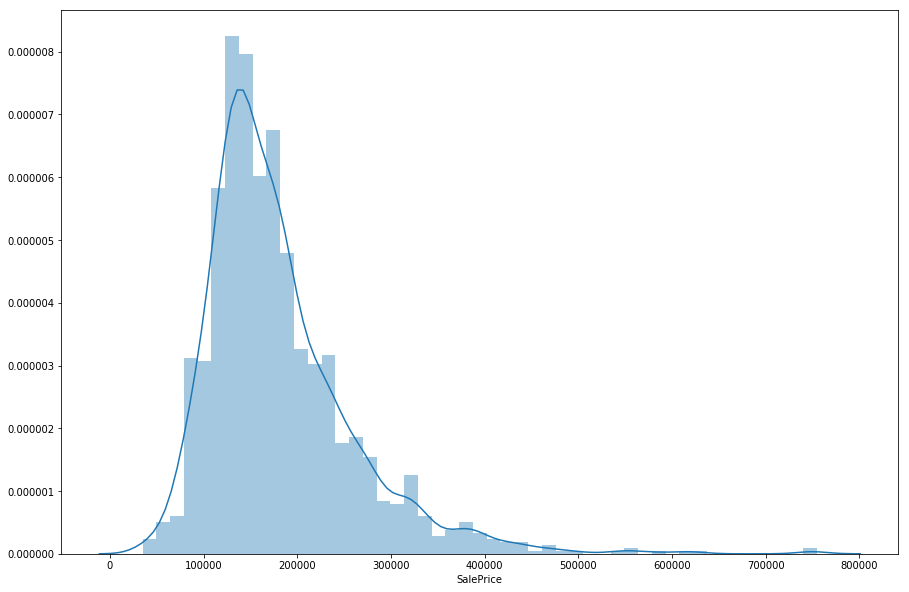

In [26]:
sns.distplot(training_data['SalePrice']);

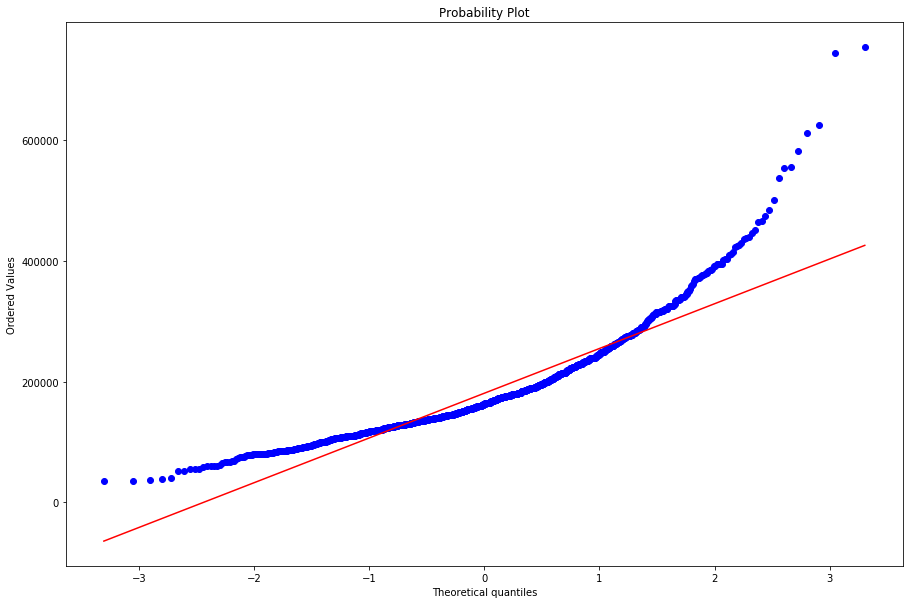

In [191]:
stats.probplot(training_data['SalePrice'], plot=plt);

Well this is not quite normally distributed, but given the skewness to the right I suspect that it is actually Log-Normally distributed

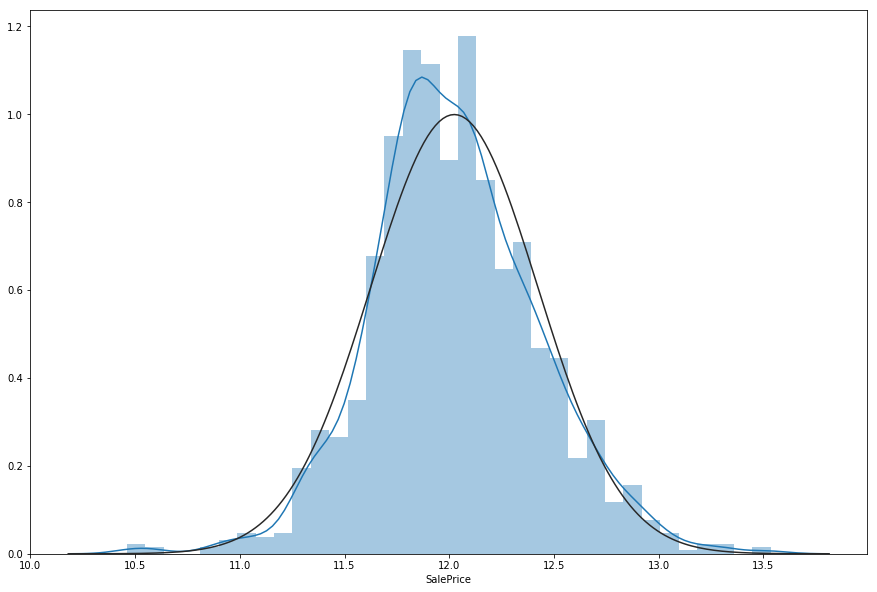

In [246]:
sns.distplot(np.log(training_data['SalePrice']), fit=stats.norm);

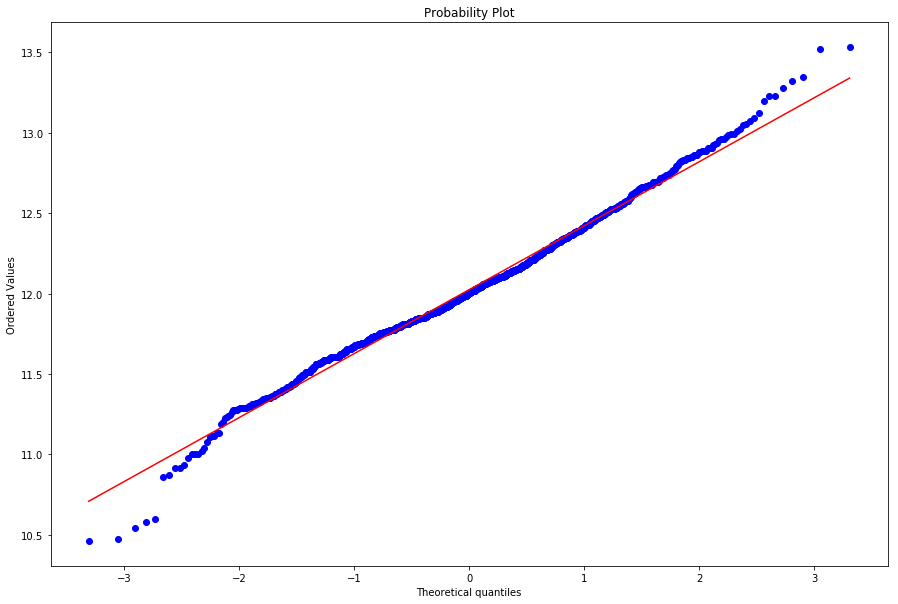

In [193]:
stats.probplot(np.log(training_data['SalePrice']), plot=plt);

So let us construct the feature LogSalePrice so that way we have a nicer distribution of values to work with, and any possible exponential dependence gets reduced to a linear dependence.

In [339]:
training_data['LogSalePrice'] = np.log(training_data['SalePrice'])

## Binary Variables

For our particular data set there are only two binary variables 

- Street
- CentralAir 

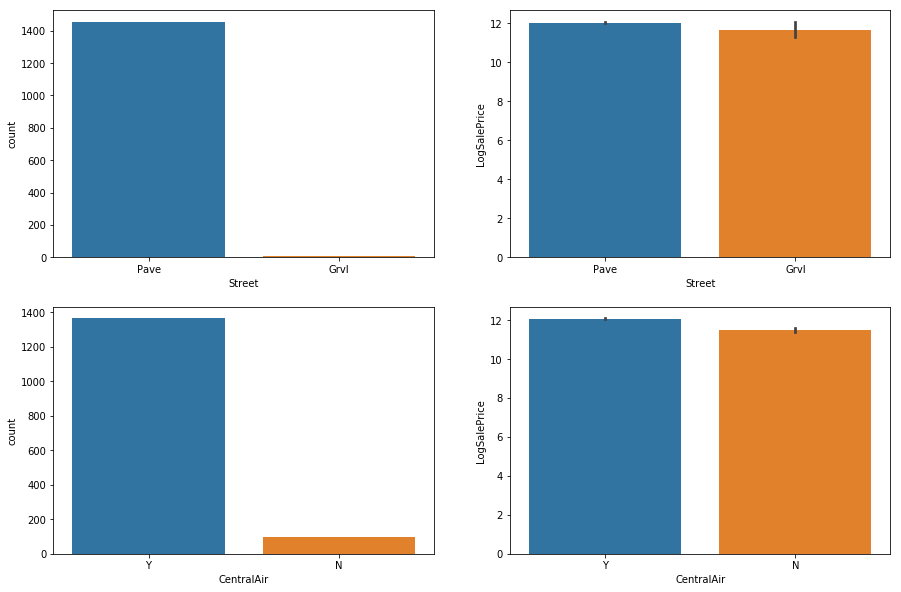

In [223]:
binary = ['Street', 'CentralAir']

plot_categorical(training_data, binary, 'LogSalePrice')

In [224]:
binary_features = ['CentralAir']

Clearly from this we can see that the sample size for street is too small to have any non random impact on the SalePrice. CentralAir seems like a decent indicator of a higher SalePrice.

## Counts

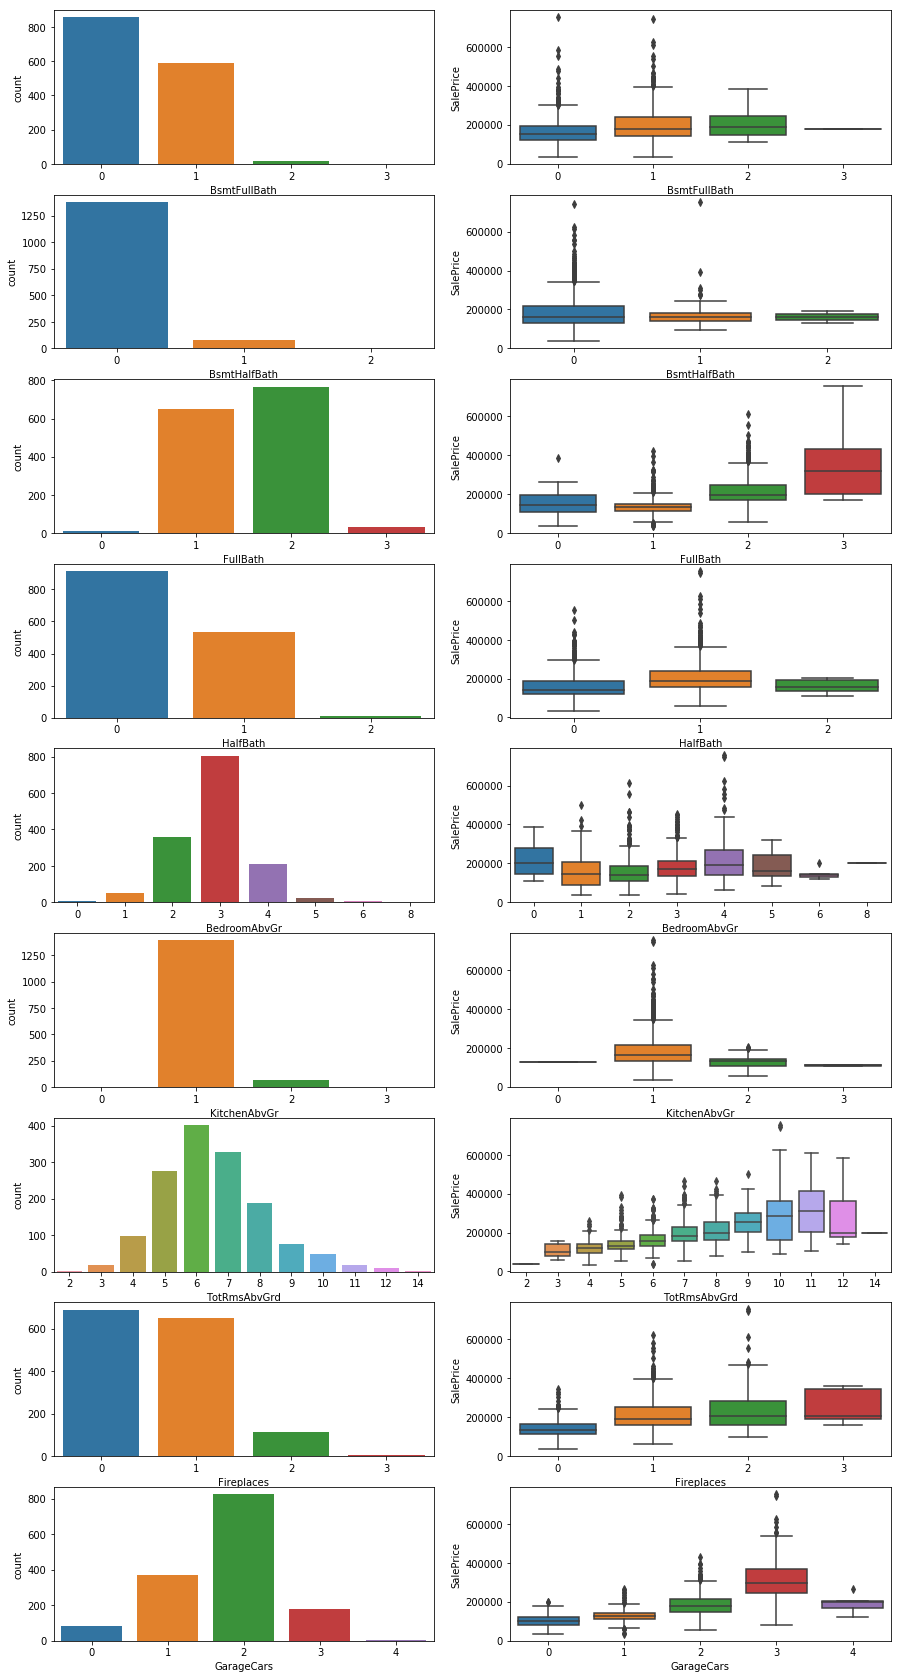

In [222]:
count = [
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageCars'
]

with plt.rc_context(rc={'figure.figsize': (15, 30)}):
    
    plot_categorical(training_data, count, 'LogSalePrice', effect_plot=sns.boxplot)

In [219]:
count_features = ['GarageCars', 'Fireplaces', 'TotRmsAbvGrd']

KeyError: 'Fireplace'

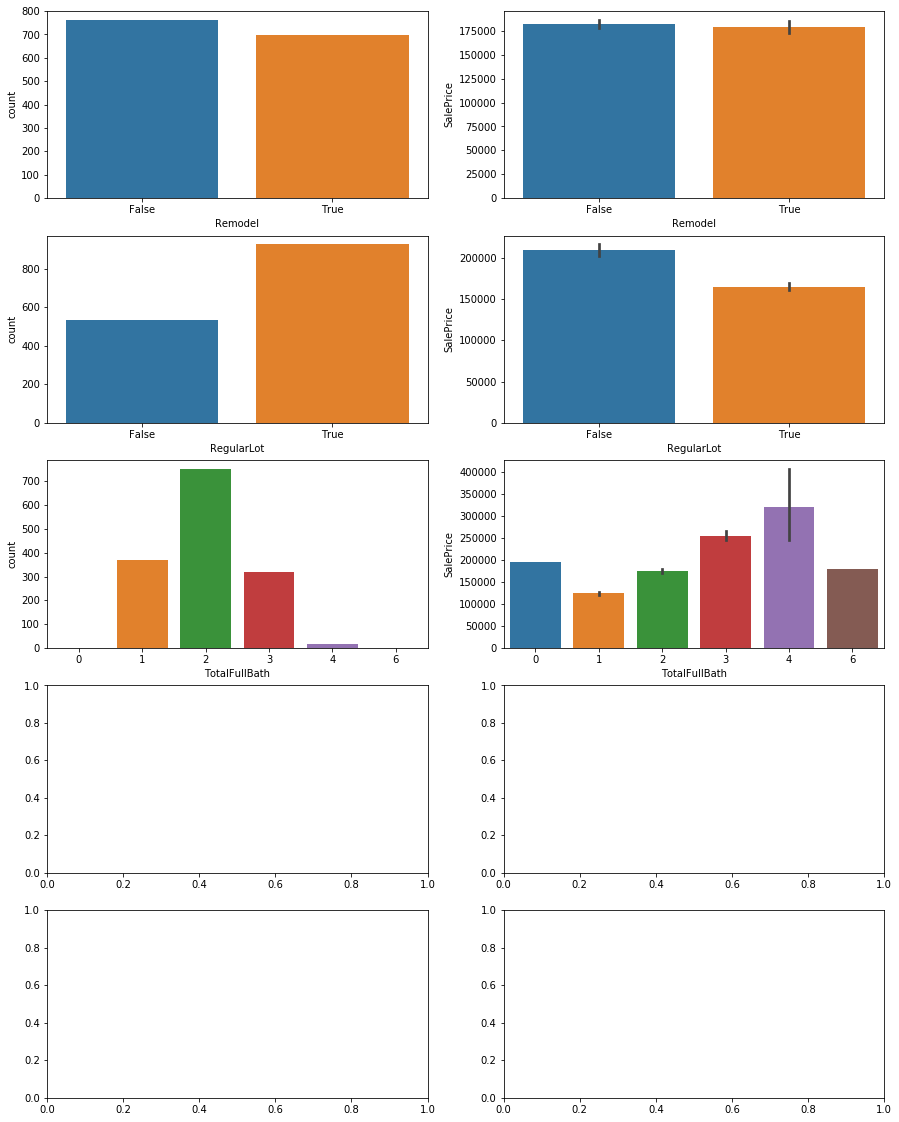

In [349]:
training_data['TotalSF'] = training_data['TotalBsmtSF'] + training_data['GrLivArea']
test_data['TotalSF'] = test_data['TotalBsmtSF'] + test_data['GrLivArea']

training_data['LogTotalSF'] = np.log(training_data['TotalSF'])
test_data['LogTotalSF'] = np.log(test_data['TotalSF'])

training_data['Remodel'] = training_data['YearBuilt'] != training_data['YearRemodAdd']
test_data['Remodel'] = test_data['YearBuilt'] != test_data['YearRemodAdd']

training_data['RegularLot'] = training_data['LotShape'] == 'Reg'
test_data['RegularLot'] = test_data['LotShape'] == 'Reg'

training_data['TotalFullBath'] = training_data['FullBath'] + training_data['BsmtFullBath']
test_data['TotalFullBath'] = test_data['FullBath'] + test_data['BsmtFullBath']

training_data['TotalHalfBath'] = training_data['HalfBath'] + training_data['BsmtHalfBath']
test_data['TotalHalfBath'] = test_data['HalfBath'] + test_data['BsmtHalfBath']

training_data['2Story'] = training_data['2ndFlrSF'] != 0
test_data['2Story'] = test_data['2ndFlrSF'] != 0


eng_features = ['Remodel', 'RegularLot', 'TotalFullBath', 'Fireplace', '2Story']

with plt.rc_context(rc={'figure.figsize': (15, 20)}):

    plot_categorical(training_data, eng_features, 'SalePrice')

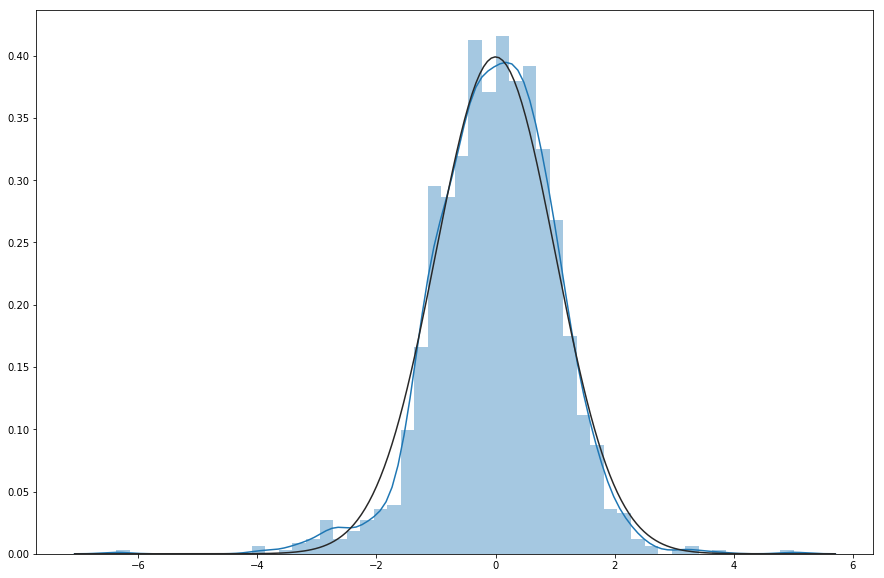

In [279]:
sns.distplot(training_data['LogTotalSF'], fit=stats.norm);

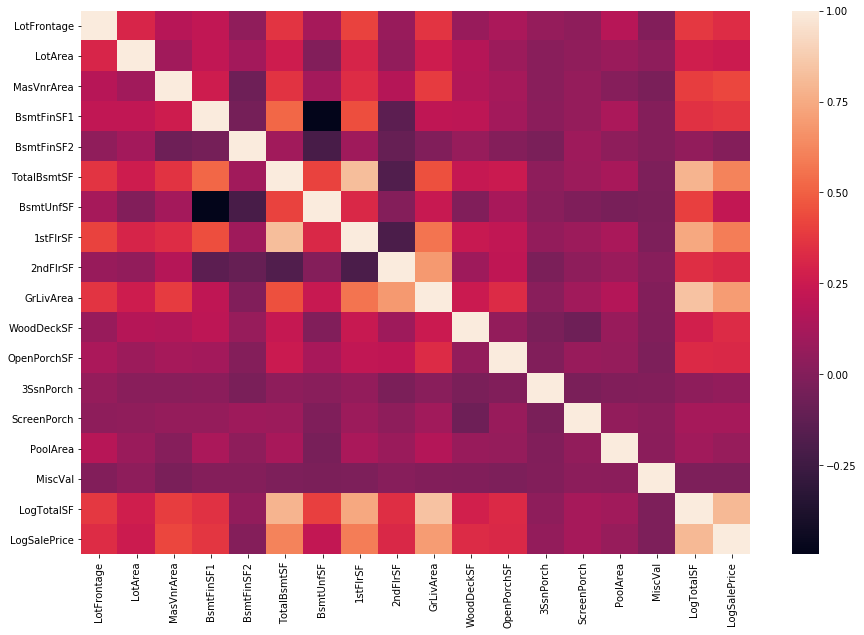

In [263]:
real = [
    'LotFrontage',
    'LotArea',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'TotalBsmtSF',
    'BsmtUnfSF',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'WoodDeckSF',
    'OpenPorchSF',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'MiscVal',
    'LogTotalSF',
    'LogSalePrice'
]
sns.heatmap(training_data[real].corr());

In [267]:
training_data[real].corr()['LogSalePrice'].sort_values(ascending=False)[1:]

LogTotalSF     0.803591
GrLivArea      0.700927
TotalBsmtSF    0.612134
1stFlrSF       0.596981
MasVnrArea     0.426775
BsmtFinSF1     0.372023
LotFrontage    0.336156
WoodDeckSF     0.334135
OpenPorchSF    0.321053
2ndFlrSF       0.319300
LotArea        0.257320
BsmtUnfSF      0.221985
ScreenPorch    0.121208
PoolArea       0.069798
3SsnPorch      0.054900
BsmtFinSF2     0.004832
MiscVal       -0.020021
Name: LogSalePrice, dtype: float64

In [281]:
real_features = ['LogTotalSF', 'MasVnrArea', 'LotFrontage']

In [320]:
sns.boxplot(x=training_data['GarageQual'] * training_data['GarageCond'], y=np.log(training_data['SalePrice']))

TypeError: can't multiply sequence by non-int of type 'str'

In [346]:
final_feature_list = binary_features + count_features + real_features

parameters = training_data.drop(['GarageYrBlt', 'SalePrice', 'LogSalePrice'], axis=1)
parameters = pd.get_dummies(parameters)
target = training_data['LogSalePrice']

In [351]:
lin_reg = LinearRegression()
lin_reg_result = cross_val_score(estimator=lin_reg, X=parameters, y=target, cv=10)

True

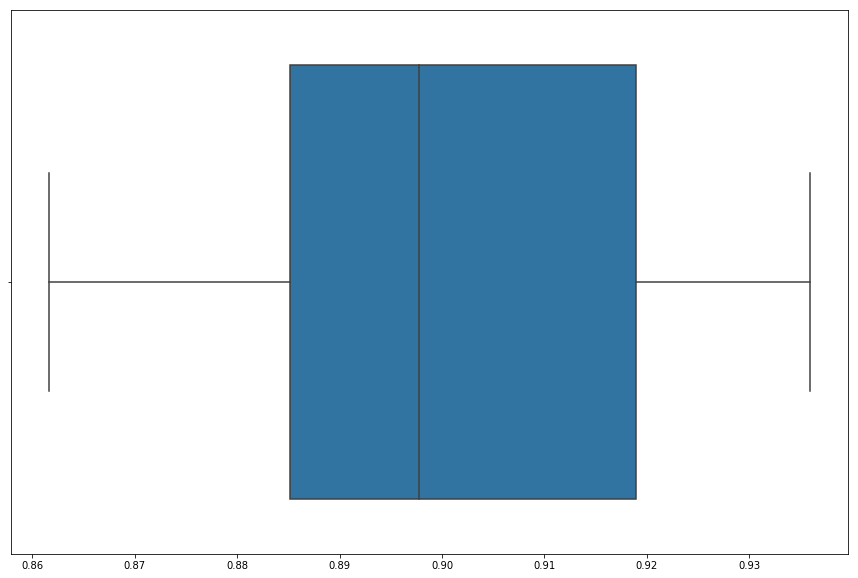

In [350]:
grad_boost = GradientBoostingRegressor(n_estimators=400)
grad_results=cross_val_score(estimator=grad_boost, X=parameters, y=target, cv=10)
sns.boxplot(grad_results)

In [348]:
params = pd.get_dummies(test_data.drop('GarageYrBlt', axis=1))
grad_boost.fit(parameters, target)
ans = np.exp(grad_boost.predict(params))

ValueError: Number of features of the model must match the input. Model n_features is 302 and input n_features is 284 

In [ ]:
submission = pd.DataFrame({'Id':test_data['Id'], 'SalePrice':ans})

In [ ]:
submission.to_csv('submission.csv', index=False)

In [275]:
elastic = ElasticNetCV()
elastic_result = cross_val_score(estimator=elastic, X=parameters, y=target, cv=10)


In [276]:
forest = RandomForestRegressor()
forest_results = cross_val_score(estimator=forest, X=parameters, y=target, cv=10)


In [277]:
bag = BaggingRegressor()
bag_results=cross_val_score(estimator=bag, X=parameters, y=target, cv=10)

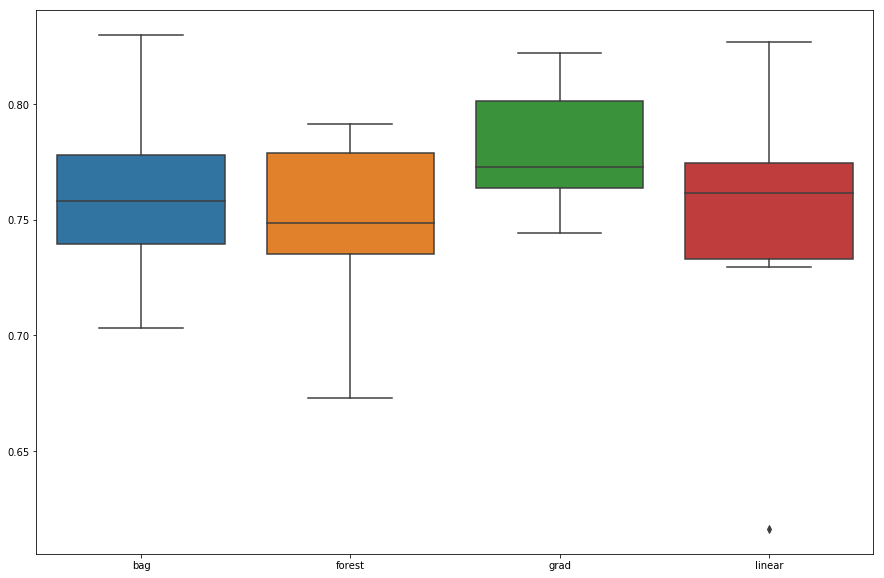

In [278]:
sns.boxplot(data=pd.DataFrame({'grad':grad_results, 'forest':forest_results, 'bag':bag_results, 'linear':lin_reg_result}))

In [29]:
nominal_feature_selected = [
    'MSSubClass',
    'MSZoning',
    'Neighborhood',
    'GarageType',
    'SaleCondition'
]

nominal_simplify = [
    'Foundation',
    'Electrical'
]

ordinal_feature_selected = [
    'Alley',
    'OverallQual',
    'ExteriorQual',
    'BsmtExposure',
    'HeatingQC'
    'CentralAir',
    'KitchenQual',
    'GarageFinish'
]

ordinal_to_binary = [
    'LotShape',
    'PavedDrive'
]

count_feature_selected = [
    'TotRmsAbvGrd',
    'YearBuilt',
    'GarageCars'
]

count_to_binary = [
    # 'YearRemodAdd', 
    'Fireplaces'
]

real_to_log_transform = [
    'TotalBsmtSF',
    'GrLivArea'
]

In [ ]:
features_to_drop = [
    'Id',
    'MoSold',
    'EnclosedPorch',
    'LowQualFinishSF',
    'MiscVal',
    '3SsnPorch',
    'PoolArea',
    'ScreenPorch',
    'BsmtUnfSF'
]